# Importing libraries

In [11]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
# open source implementation of LBP
from skimage.feature import local_binary_pattern
# data preprocessing and metrics module in scikit-learn
from sklearn import preprocessing, metrics
# SVM implementation in scikit-learn
from sklearn.svm import LinearSVC

In [14]:
import os
import zipfile
import urllib.request
import numpy as np
from PIL import Image, ImageOps
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Features Extraction (LBP)
https://www.youtube.com/watch?v=-lPem5Ahvfw 

In [13]:
def compute_lbp(arr):
    """Find LBP of all pixels.
    Also perform Vectorization/Normalization to get feature vector.
    """
    # LBP function params
    radius = 3
    n_points = 8 * radius
    n_bins = n_points + 2
    lbp = local_binary_pattern(arr, n_points, radius, 'uniform')
    lbp = lbp.ravel()
    # feature_len = int(lbp.max() + 1)
    feature = np.zeros(n_bins)
    for i in lbp:
        feature[int(i)] += 1
    feature /= np.linalg.norm(feature, ord=1)
    return feature

# Preparing the data , loading and pre processing 

In [22]:
Categories=['wood','water','stone','foliage']
flat_data_arr=[] #input array
target_arr=[] #output array
vec=[] #features array
datadir='/content/drive/MyDrive/image'
#path which contains all the categories of images
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
      if (os.path.join(path,img).endswith('.jpg')):
        img_array=imread(os.path.join(path,img),as_gray=True) #this time we will be reading our data in grayscale
        img_resized=resize(img_array,(512,384))
        flat_data_arr.append(img_resized.flatten())
        feature = compute_lbp(img_resized)
        vec.append(feature)
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : wood
loaded category:wood successfully
loading... category : water
loaded category:water successfully
loading... category : stone
loaded category:stone successfully
loading... category : foliage
loaded category:foliage successfully


In [23]:
data=np.array(vec)
target=np.array(target_arr)

In [24]:
np.shape(data)

(400, 26)

# Preparing the dataframe

In [25]:
df=pd.DataFrame(vec) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

# Applying the model

In [26]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
svc.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


# Testing the model

In [28]:
from sklearn.metrics import accuracy_score
y_pred=svc.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 0 3 0 0 0 0 3 3 3 3 0 3 3 3 3 2 2 0 2 3 3 2 3 1 3 3 3 3 3 3 3 3 3 0 2 3
 3 2 3 0 3 3 0 0 1 0 3 0 2 0 0 0 2 3 0 3 0 3 0 0 2 0 0 0 3 3 0 0 3 0 2 0 2
 0 0 3 0 3 0]
The actual data is:
[0 0 0 0 2 0 0 3 2 3 3 2 3 3 1 3 2 2 2 2 3 3 3 1 1 2 1 1 1 1 2 3 1 1 0 2 3
 1 1 3 0 3 1 1 1 3 0 3 0 0 3 2 0 0 3 1 3 0 1 0 0 2 0 2 0 1 2 2 2 3 0 3 2 2
 0 2 1 2 1 1]
The model is 50.0% accurate


# Testing the model on external images

Enter URL of Image :https://images.unsplash.com/photo-1615744455875-7ad33653e8c4?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxleHBsb3JlLWZlZWR8M3x8fGVufDB8fHx8&w=1000&q=80


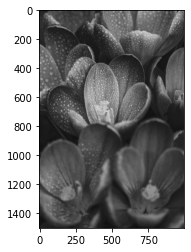

wood = 8.547433654366163%
water = 25.399679034908644%
stone = 15.677459013385295%
foliage = 50.37542829733985%
The predicted image is : foliage


In [43]:
url=input('Enter URL of Image :')
img=imread(url,as_gray=True)
plt.imshow(img,cmap='gray')
plt.show()
img_resize=resize(img,(512,384))
l=compute_lbp(img_resize)
L=l.reshape(1, -1)
probability=svc.predict_proba(L)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[svc.predict(L)[0]])